Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.9074 - loss: 0.2915 - val_accuracy: 0.9861 - val_loss: 0.0407
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9863 - loss: 0.0437 - val_accuracy: 0.9898 - val_loss: 0.0307
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9918 - loss: 0.0271 - val_accuracy: 0.9904 - val_loss: 0.0290
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9942 - loss: 0.0191 - val_accuracy: 0.9886 - val_loss: 0.0387
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9956 - loss: 0.0138 - val_accuracy: 0.9861 - val_loss: 0.0428


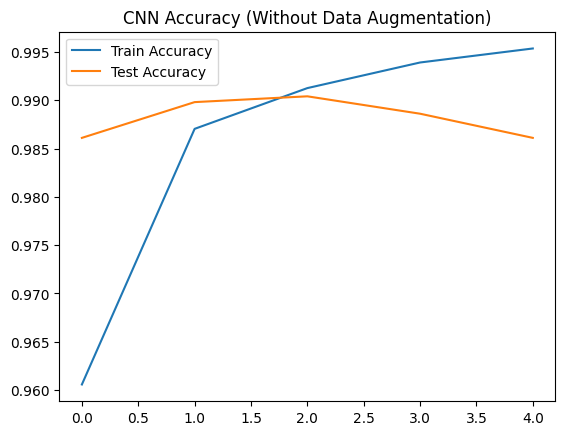

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9831 - loss: 0.0507
Test Accuracy (Without Augmentation): 0.9861


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]


model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title("CNN Accuracy (Without Data Augmentation)")
plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy (Without Augmentation): {test_acc:.4f}")
